In [126]:
import itertools
import random
import statistics

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

%matplotlib inline

# Part 1: Binning degree distributions

## Binning real numbers

> Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian
> distribution with $\mu = 2$ and $\sigma = 0.125$.

In [127]:
size = 5000
data = [random.gauss(2, 0.125) for _ in range(size)]

> Now, let's use `numpy.histogram` to bin those numbers into 10 bins.

In [128]:
counts, bins = np.histogram(data, 10)
print(f'Counts: {counts}')
print(f'Bin edges: {bins}')

Counts: [   3   52  237  790 1399 1416  780  267   50    6]
Bin edges: [1.5197566  1.61591827 1.71207994 1.8082416  1.90440327 2.00056494
 2.09672661 2.19288827 2.28904994 2.38521161 2.48137328]


> What does the `numpy.histogram` function return?
> Do the two arrays have the same length?

Invocation of `numpy.histogram` returns a tuple `(hist, bin_edges)`, which can be described as follows:

* `hist` - a list which elements represent the number of elements in the respective bins
* `bin_edges` - a list which elements represent the lower bounds of the respective bins. Its length is one more than the length of `hist`, because it contains upper bound of the rightmost bin as well.


> Then we use `matplotlib.pyplot.plot` to plot the binned data.

> You will have to deal with the fact that the counts- and bin-arrays have different lengths.
> Explain how you deal with this problem and why.

We need to transform the arrays to fit the plot function, i.e. they must have equal sizes. Also, to obtain 'hist-like' plot we need to properly duplicate values. Ex. for `edges = [1, 2, 3, 4]` and `hist = [2, 6, 30]` we need to obtain `x(from edges) = [1, 2, 2, 3, 3, 4]` and `y(from hist) = [2, 2, 6, 6, 30, 30]` to properly visualize the 'steps' of the histogram

To do so:
- x(edges): all values except for the first and the last one should be duplicated
- y(hist): all values need to be duplicated

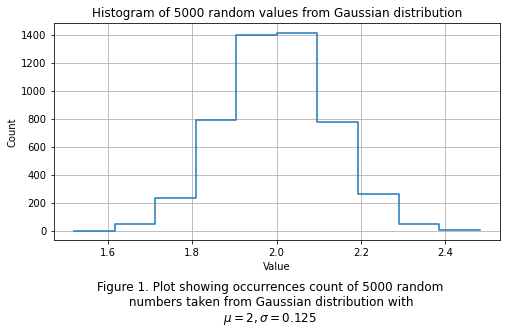

In [129]:
def plot_from_histogram(counts, edges):
    reps = [1] + [2 for _ in edges[1:-1]] + [1]
    x = np.repeat(edges, reps)
    y = np.repeat(counts, 2)
    return x, y

plt.figure(figsize=(8, 4))
plt.plot(*plot_from_histogram(counts, bins))
plt.title('Histogram of 5000 random values from Gaussian distribution')
plt.xlabel('Value')
plt.ylabel('Count')
plt.grid()
caption = 'Figure 1. Plot showing occurrences count of 5000 random\n numbers taken from Gaussian distribution with\n' + r'$\mu = 2, \sigma = 0.125$'
plt.figtext(0.5, -0.15, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

Figure 1. illustrates the plot visualizing distribution of 5000 real random numbers taken from Gaussian distribution ($\mu = 2, \sigma = 0.125$). As can be expected, most of the values are between 1.9 and 2.1 and the further are they from 2.0, they less frequently they occur. Minimal and maximal value are around 1.6 and 2.4 respectively.

## Binning integers
  > But binning real numbers into a fixed number of bins is easy when
   `numpy.histogram` does all the work and finds the right bin boundaries for you.
Now we'll generate a bunch of integers and set the bin boundaries manually.
This time, let's grab data from a Poisson distribution.
As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers.

In [130]:
data = np.random.poisson(10, size)
print(f'Max: {np.max(data)}')
print(f'Min: {np.min(data)}')

Max: 23
Min: 1


  > Instead of simplify specifying the number of bins
   for `numpy.histogram`, let's specify the bins we want using a vector.
   Create a vector $v$ that results in a binning that puts each
   integer value in its own bin and where the first bin contains
   the minimum number you found above, and the last bin contains
   the maximum number (you may want to think about how `numpy.histogram`
   deals with the smallest an largest value in particular;

In [131]:
vector = list(range(np.min(data), np.max(data) + 2))

>is it correct
   to set the first entry of $v$ to be equal to the smallest value you
   observe and the last entry of $v$ to be the highest value observed?).

Since all values are integers coming from a discrete Poisson distribution, there exists a need to create an additional bin for the maximum value in the vector to also have a bin where it can be placed, hence the `+2` in the invocation above is needed (contrary to the expected `+1`) to have all the necessary bins. Otherwise, the maximum number would be placed in the same bin as the second maximum number.

>Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$.

In [132]:
values, bins = np.histogram(data, bins=vector)

> What is the sum over bin counts?

In [133]:
for value, b in zip(values, bins[:-1]):
    print(f'Bin: {b} – {value}')

print(f'Sum over bin counts - {sum(values)}')

Bin: 1 – 5
Bin: 2 – 13
Bin: 3 – 44
Bin: 4 – 103
Bin: 5 – 198
Bin: 6 – 304
Bin: 7 – 441
Bin: 8 – 584
Bin: 9 – 579
Bin: 10 – 589
Bin: 11 – 600
Bin: 12 – 462
Bin: 13 – 388
Bin: 14 – 254
Bin: 15 – 191
Bin: 16 – 113
Bin: 17 – 69
Bin: 18 – 33
Bin: 19 – 15
Bin: 20 – 6
Bin: 21 – 6
Bin: 22 – 2
Bin: 23 – 1
Sum over bin counts - 5000


> Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.

The vector is created with `max + 1` value,
because when the bins are truncated,
the last item during plotting will be truncated too.
The `min` and `max` represents the boundaries of the distribution
and the rest of the values is distributed amongst the rest of
the bins (a Poisson distribution is a distribution with discrete values).

> Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution

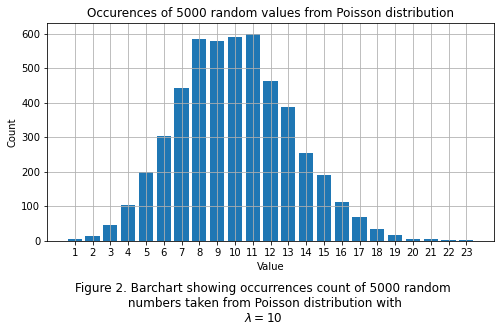

In [134]:
plt.figure(figsize=(8, 4))
plt.bar(bins[:-1], values, width=.8)
plt.title('Occurences of 5000 random values from Poisson distribution')
plt.ylabel('Count')
plt.xlabel('Value')
plt.xticks(np.arange(np.min(bins[:-1]), np.max(bins[:-1]) + 1, 1))
plt.grid()
caption = 'Figure 2. Barchart showing occurrences count of 5000 random\n numbers taken from Poisson distribution with\n' + r'$\lambda = 10$'
plt.figtext(0.5, -0.15, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

Figure 2. shows distribution of 5000 integer values from Poisson distribution with $\lambda = 10$. Most of the values are between 9 and 11, and the further are they from 10, the less frequently they occur. The shape of the plot is very similar to the one which was obtained by plotting 5000 numbers from Gaussian distribution.

## Binning and plotting degree distributions.
> Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above.
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$?
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.

In [135]:
k = 10
p = k / (size - 1)
print(f'The probability p that results in an average degree of {k} is {p:.3f}')

The probability p that results in an average degree of 10 is 0.002


> Now, use `networkx` to create the graph and extract the degree distribution.

In [136]:
G = nx.erdos_renyi_graph(size, p)
degrees = [degree for _, degree in G.degree()]

> Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

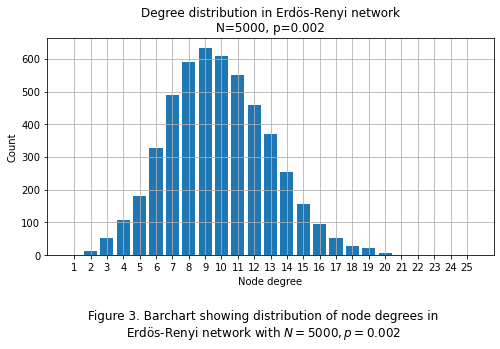

In [137]:
vector = list(range(np.min(degrees), np.max(degrees) + 2))
graph_values, graph_bins = np.histogram(degrees, bins=vector)
plt.figure(figsize=(8, 4))
plt.bar(graph_bins[:-1], graph_values, width=.8)
plt.title('Degree distribution in Erdös-Renyi network\nN=5000, p=0.002')
plt.xlabel('Node degree')
plt.ylabel('Count')
plt.xticks(np.arange(np.min(degrees), np.max(degrees) + 1, 1))
plt.grid()
caption = 'Figure 3. Barchart showing distribution of node degrees in\nErdös-Renyi network with ' + r'$N=5000, p=0.002$'
plt.figtext(0.5, -0.15, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

Figure 3. illustrates distribution of node degrees in Erdös-Renyi network with 5000 nodes and 0.002 probability of exisiting connection between a pair of nodes. The shape of the distribution plot is very similar to the one showing Gaussian or Poisson distributed numbers.

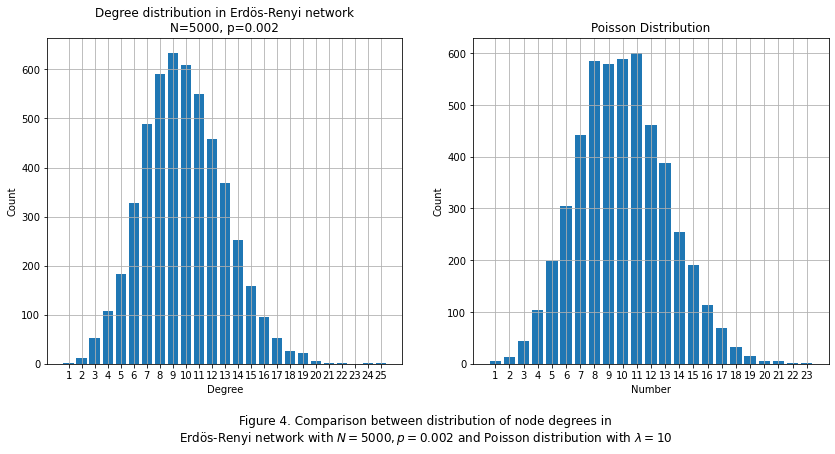

In [138]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.bar(graph_bins[:-1], graph_values, width=0.8)
plt.title('Degree distribution in Erdös-Renyi network\nN=5000, p=0.002')
plt.ylabel('Count')
plt.xlabel('Degree')
plt.xticks(np.arange(np.min(graph_bins[:-1]), np.max(graph_bins[:-1]) + 1, 1))
plt.grid()

plt.subplot(122)
plt.bar(bins[:-1], values, width=.8)
plt.title('Poisson Distribution')
plt.ylabel('Count')
plt.xlabel('Number')
plt.xticks(np.arange(np.min(bins[:-1]), np.max(bins[:-1]) + 1, 1))
plt.grid()
caption = 'Figure 4. Comparison between distribution of node degrees in\nErdös-Renyi network with ' + r'$N=5000, p=0.002$' + ' and Poisson distribution with ' + r'$\lambda = 10$'
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

Figure 4. compares plots from Figure 3. and Figure 2. It suggests with great confidence that node degrees in Erdös-Renyi network follow Poisson distribution

# Part 2: Random networks and plotting in `networkx`

> In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks').
> The exercise can be found in Section 3.11: Homework.
> Consider an Erdős-Rényi network with N = 3,000 nodes,
> connected to each other with probability p = 10–3.
> What is the expected number of links,〈L〉?

In [139]:
N = 3000
p = .001
L = p * N * (N - 1) / 2
print(f'Expected 〈L〉: {L}')

Expected 〈L〉: 4498.5


> In which regime is the network?

It is in the supercritical regime but not Connected regime because 〈k〉< logN

In [140]:
k = p * (N - 1)
print(f'〈k〉= {k}, logN = {np.log(N)}')

〈k〉= 2.999, logN = 8.006367567650246


> Calculate the probability pc so that the network is at the critical point

In [141]:
pc = 1 / N
print(f'The critical point probability pc is {pc}')

The critical point probability pc is 0.0003333333333333333


> Given the linking probability p = 10e–3,
> calculate the number of nodes Ncr
> so that the network has only one component.

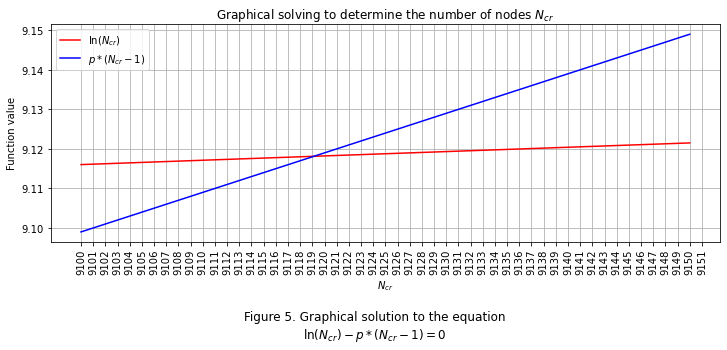

In [142]:
p_linking = 0.001
args = np.linspace(9100, 9150, num=50)
f1 = np.log(args)
f2 = p_linking * (args - 1)
plt.figure(figsize=(12, 4))
plt.plot(args, f1, 'r')
plt.plot(args, f2, 'b')
plt.xlabel(r'$N_{cr}$')
plt.xticks(np.arange(9100, 9151 + 1, 1), rotation='vertical')
plt.ylabel('Function value')
plt.grid()
plt.title(r'Graphical solving to determine the number of nodes $N_{cr}$')
caption = 'Figure 5. Graphical solution to the equation\n' + r'$\ln(N_{cr}) - p * (N_{cr}-1) = 0$'
plt.figtext(0.5, -0.2, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.legend(['$\ln(N_{cr})$', '$p * (N_{cr} - 1)$'])
plt.show()

Figure 5. shows a graphical solution to determine $N_{cr}$. Intersection of $\ln(N_{cr})$ and $p*(N_{cr}-1)$ happens at $N_{cr} = 9119$.

In [143]:
N_cr = 9119
print(f'The required number of nodes for the network to have one component is - {int(N_cr)}')

The required number of nodes for the network to have one component is - 9119


> For the network in (d), calculate the average degree 〈kcr〉
> and the average distance between two randomly chosen nodes 〈d〉.

In [144]:
k_cr = p * (N_cr - 1)
print('Average degree <kcr> is:', k_cr)
d_cr = np.log(N_cr) / np.log(k_cr)
print('Average distance <d> between two randomly chosen nodes:', int(d_cr))

Average degree <kcr> is: 9.118
Average distance <d> between two randomly chosen nodes: 4


> Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).

In [145]:
p_k = np.exp(-k_cr) * k_cr ** k_cr / np.math.gamma(k_cr + 1)
print('Degree distribution pk of the network (approximated with a Poisson degree distribution):', p_k)

Degree distribution pk of the network (approximated with a Poisson degree distribution): 0.13091597767188703


> Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).

In [146]:
random.seed(42)

edges_number = 200 * 1.5 / 2
G = nx.gnm_random_graph(200, edges_number)

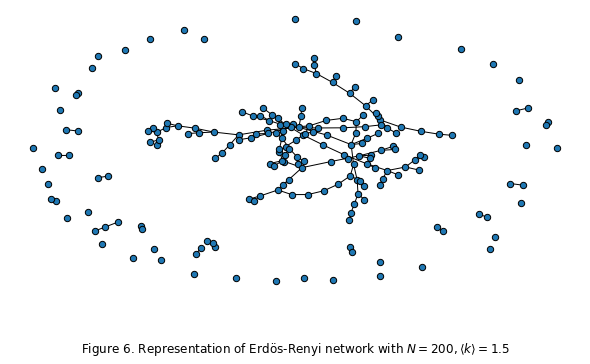

In [147]:
plt.figure(figsize=(8, 4))
nx.draw(G, node_size=40, node_shape='o', edgecolors='#000000')

caption = 'Figure 6. Representation of Erdös-Renyi network with ' + r'$N=200, \langle k \rangle = 1.5$'
plt.figtext(0.5, -0.2, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

Figure 6. shows a Erdös-Renyi network ($N=200, \langle k \rangle = 1.5$). Compliant with the theory, there is one giant component and multiple isolated nodes.

> Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)

In [148]:
#connected_component_subgraphs removed in 2.4
component = max(nx.connected_components(G), key=len)
gcc = nx.subgraph(G, component)

> Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)

In [149]:
n = random.choice(list(component))

> Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)

In [150]:
paths = nx.single_source_shortest_path(gcc, n, 2)

> Plot the GCC with the following choice of colors. Starting node _black_ (`'#000000'`). The nodes 2 steps away _red_ (`'#ff0000'`). All other nodes _blue_ (`'#A0CBE2'`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

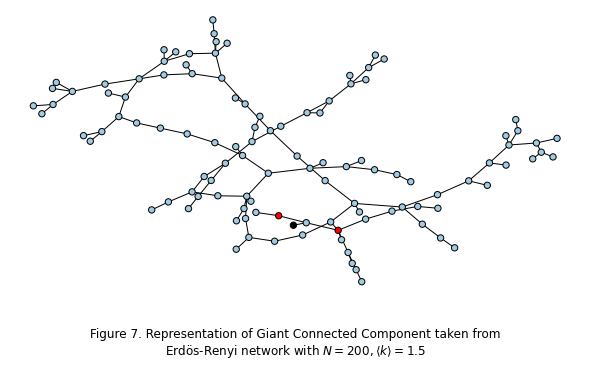

In [151]:
red = []
for i in paths:
    if len(paths[i]) == 3:
        red.append(paths[i][2])

cmap = []
for node in component:
    if node in red:
        cmap.append('#ff0000')
    elif node == n:
        cmap.append('#000000')
    else:
        cmap.append('#A0CBE2')

plt.figure(figsize=(8, 4))
nx.draw(gcc, node_color=cmap, node_size=40, node_shape='o',edgecolors='#000000')

caption = 'Figure 7. Representation of Giant Connected Component taken from\nErdös-Renyi network with ' + r'$N=200, \langle k \rangle = 1.5$'
plt.figtext(0.5, -0.2, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

Figure 7. visualizes Giant Connected Component taken from Erdös-Renyi network ($N = 200, \langle k \rangle = 1.5$). Random starting point is colored in black, nodes 2 steps away from it are red.

## Part 3: Watts-Strogatz Networks

> Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each,
> average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$.
> Calculate the average shortest path length $\langle d \rangle$ for each one.

In [152]:
n, probabilities, k = 500, [0, 0.1, 1], 4

graphs = [nx.watts_strogatz_graph(n, k, p) for p in probabilities]
    

for graph, p in zip(graphs, probabilities):
    print(f'Average shortest path for p = {p} is {nx.average_shortest_path_length(graph)}')

Average shortest path for p = 0 is 62.875751503006015
Average shortest path for p = 0.1 is 7.463639278557114
Average shortest path for p = 1 is 4.778549098196393


> Describe what happens to the network when $p = 1$.

A value of $p$ approaching 1 causes the links to be rewired in such a manner, so that the graph represents a fully random Erdös-Renyi network in lieu of a regular/small-world network.

> Let's understand the behavior of the WS model as we increase _p_ in more detail.
> Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$.

In [153]:
graphs = {x: [] for x in [0, 0.01, 0.03, 0.05, 0.1, 0.2]}

for index, p in itertools.product(range(50), [0, 0.01, 0.03, 0.05, 0.1, 0.2]):
    graphs[p].append(nx.watts_strogatz_graph(n, k, p))

>Calculate the average of $\langle d \rangle$ as well as the standard deviation
>over the 50 networks, to create a plot that shows how the path length decreases
>very quickly with only a little fraction of re-wiring.
>Use the standard deviation to add errorbars to the plot.

In [154]:
def calculate_properties(graphs, p):
    results = np.empty(len(graphs))
    for index, graph in enumerate(graphs):
        results[index] = nx.average_shortest_path_length(graph)

    return results.mean(), results.std(), p

lengths = np.array([calculate_properties(graphs[p], p) for p in graphs.keys()])

In [155]:
print(f'Average shorest path and standard deviation (respectively)')
for elem in lengths: 
    print(f'Probability {elem[2]:.2f}: {elem[0]:.3f}, {elem[1]:.3e}')

Average shorest path and standard deviation (respectively)
Probability 0.00: 62.876, 7.105e-15
Probability 0.01: 24.673, 6.674e+00
Probability 0.03: 13.251, 1.290e+00
Probability 0.05: 10.248, 5.786e-01
Probability 0.10: 7.647, 2.534e-01
Probability 0.20: 6.093, 1.285e-01


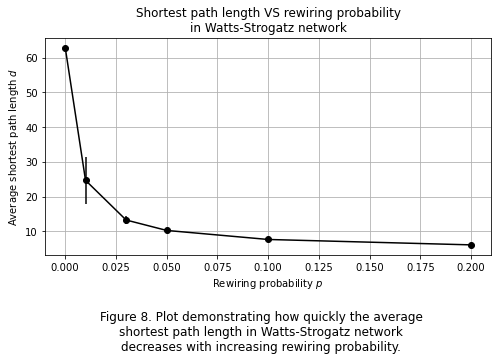

In [156]:
# Plotting
plt.figure(figsize=(8, 4))
plt.errorbar(graphs.keys(), lengths[:, 0], yerr=lengths[:, 1], fmt='o-k')
plt.title('Shortest path length VS rewiring probability\nin Watts-Strogatz network')
plt.xlabel(r'Rewiring probability $p$')
plt.ylabel(r'Average shortest path length $d$')
plt.grid()
caption = 'Figure 8. Plot demonstrating how quickly the average\nshortest path length in Watts-Strogatz network\ndecreases with increasing rewiring probability.'
plt.figtext(0.5, -0.2, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

Figure 8. shows plot illustrating dependency between average shortest path length and rewiring probability in Watts-Strogatz network. Even the smallest increase in $p$ causes the average shortest path to decrease signifcantly.

## Part 4. The Barabasi-Albert Model

>We're going to create our own Barabasi-Albert model (a special case) right in a `notebook`.
>Follow the recipe below for success
>Create a 100 node BA network using a BA model that
>you've coded on your own (so don't use the built-in NetworkX function,
>but the one you created during week 3).

In [157]:
g100 = nx.Graph()
g100.add_node(0)
g100.add_node(1)
g100.add_edge(0, 1)

import random

for i in range(2, 100):
    nodesProportionA = [e[0] for e in g100.edges]
    nodesProportionB = [e[1] for e in g100.edges]
    nodesProp = nodesProportionA + nodesProportionB
    g100.add_node(i)
    g100.add_edge(random.choice(nodesProp), i)

>And plot it using NetworkX.

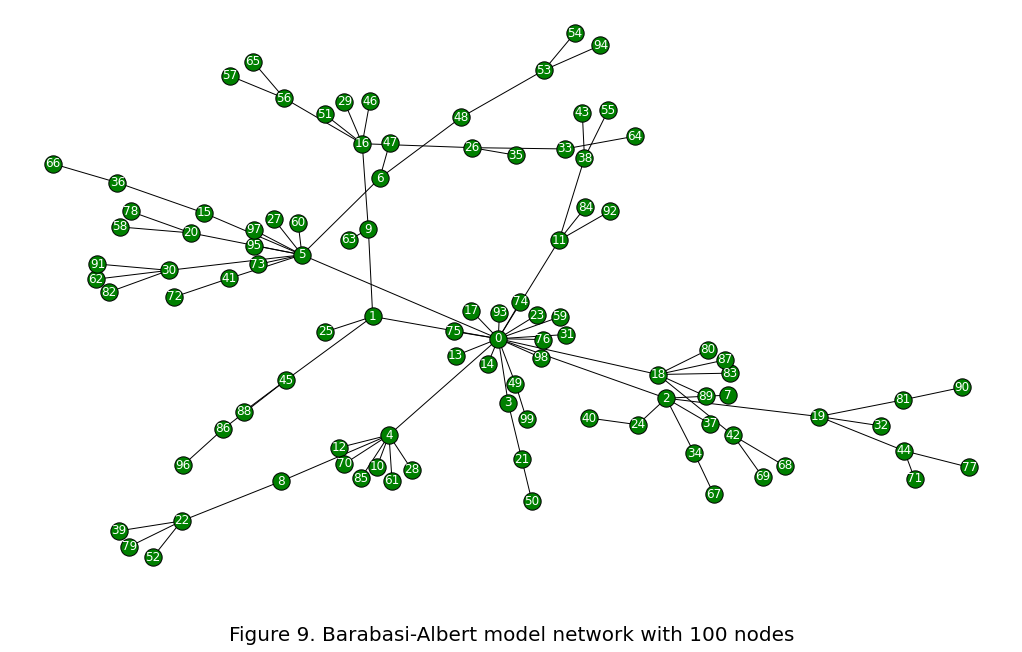

In [158]:
plt.figure(figsize=(14, 8))
nx.draw(
    g100, node_color='green', node_size=300, node_shape='o',
    edgecolors='#000000', font_color='white', with_labels=True,
    label='Aecd'
)
nx.spring_layout(G, k=0.75, iterations=50)
caption = 'Figure 9. Barabasi-Albert model network with 100 nodes'
plt.figtext(0.5, -0.1, caption, wrap=True, horizontalalignment='center', fontsize=20)
plt.show()

Figure 9. illustrates graph of Barabasi-Albert model with 100 nodes. There is one giant component, with several nodes of exceptionally high degree (10+) and many with lower degree, around 1-4.

>Now create a 5000 node network.

In [159]:
g5000 = nx.Graph()
g5000.add_node(0)
g5000.add_node(1)
g5000.add_edge(0, 1)

for i in range(2, 5000):
    nodesProportionA = [e[0] for e in g5000.edges]
    nodesProportionB = [e[1] for e in g5000.edges]
    nodesProp = nodesProportionA + nodesProportionB
    g5000.add_node(i)
    g5000.add_edge(random.choice(nodesProp), i)

>What's the maximum and minimum degree?

In [160]:
# Extracting degree distribution
degrees_ba = []
for node, degree in nx.degree(g5000):
    degrees_ba.append(degree)

degrees_ba = np.array(degrees_ba)

max_deg = np.max(degrees_ba)
min_deg = np.min(degrees_ba)
print(f'max degree in 5000-node graph - {max_deg}')
print(f'min degree in 5000-node graph - {min_deg}')

max degree in 5000-node graph - 101
min degree in 5000-node graph - 1


>Now, bin the degree distribution, for example using `numpy.histogram`.

In [161]:
# Preparing the data for scatterplot
def scatter_from_histogram(counts, edges):
    return edges[:-1], counts
counts_ba, edges_ba = np.histogram(degrees_ba, bins=50)

>Plot the distribution. Plot it with both linear and log-log axes.

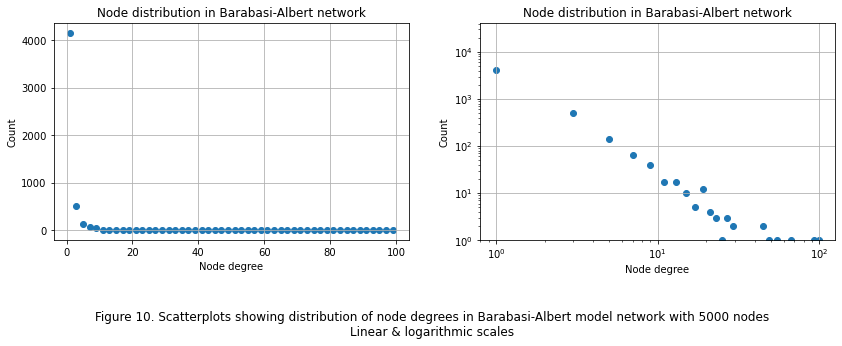

In [162]:
# Plotting
plt.figure(figsize=(14, 4))

plt.subplot(121)
plt.scatter(*scatter_from_histogram(counts_ba, edges_ba))
plt.xlabel('Node degree')
plt.ylabel('Count')
plt.title('Node distribution in Barabasi-Albert network')
plt.grid()

plt.subplot(122)
plt.scatter(*scatter_from_histogram(counts_ba, edges_ba))
plt.xlabel('Node degree')
plt.xscale('log')
plt.ylabel('Count')
plt.yscale('log')
plt.ylim([10e-1, np.max(counts_ba)*10])
plt.title('Node distribution in Barabasi-Albert network')
plt.grid()

caption = 'Figure 10. Scatterplots showing distribution of node degrees in Barabasi-Albert model network with 5000 nodes\nLinear & logarithmic scales'
plt.figtext(0.5, -0.2, caption, wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

Figure 10. shows two scatterplots illustrating node degree distribution in Barabasi-Albert model with linear and logarithmic scales. Both plots clearly indicate existence of several nodes with high degree and many others with low degree. Log-Log plot is more useful in that case, as it allows to separate the data more clearly.

## Part 5 Power-laws and the friendship paradox

> Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox).
>This paradox states that _almost everyone_ have fewer friends than their
>friends have, on average. This sounds crazy, but is actually an almost
>trivial consequence of living in a social network with a power-law
>degree distribution. The explanation is that almost everyone is friends
>with a hub, that drives up the average degree of the friends.
>Let's explore that in the 5000 node BA network we've just generated. Do the following:

> Pick a node _i_ at random (e.g. use `random.choice`).

> [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).

> Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html).

> And calculate their average degree.

In [163]:
def random_and_friends(g):
    random_node = random.choice(list(g.nodes))
    own_degree = g.degree(random_node)
    friends = g.neighbors(random_node)
    friends_degrees = [g.degree(f) for f in friends]
    return own_degree, statistics.mean(friends_degrees)

In [164]:
own, friends = random_and_friends(g5000)
print(f'Random node degree: {own}')
print(f'Average degree of neighbours of the randomly selected node: {friends}')

Random node degree: 1
Average degree of neighbours of the randomly selected node: 4


> Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
> Do this 1000 times. How many out of those 1000 times is the friendship paradox true?



In [165]:
def friendship_paradox_test(graph, n_iter=1000):
    results = []
    for i in range(n_iter):
        own, friends = random_and_friends(graph)
        results.append(own < friends)
    return np.unique(results, return_counts=True)

summary = friendship_paradox_test(g5000)
print(f'Times paradox was {summary[0][0]}: {summary[1][0]}')
print(f'Times paradox was {summary[0][1]}: {summary[1][1]}')

Times paradox was False: 135
Times paradox was True: 865


> Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.

> Compare to the ER network of same size and same $p$.
> What are the differences? Explain in your own words.
> *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

In [166]:
# Calculate parameters of corresponding ER network
n_ba = 5000
k_ba = degrees_ba.mean()
p_ba = k_ba / (n_ba - 1)
er_ba = nx.erdos_renyi_graph(n_ba, p_ba)
ba = g5000

# Get its degrees
degrees_er_ba = []
for node, degree in nx.degree(er_ba):
    degrees_er_ba.append(degree)

degrees_er_ba = np.array(degrees_er_ba)

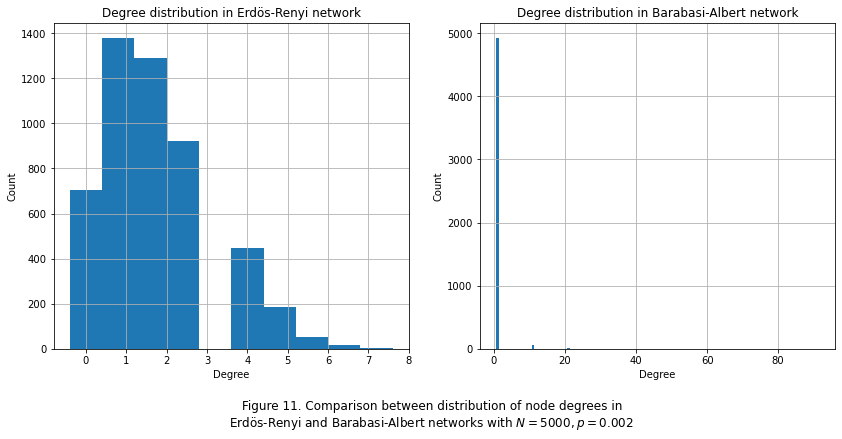

In [167]:
# Compare degree distribution
plt.figure(figsize=(14, 6))
# ER network
counts_er_ba, bins_er_ba = np.histogram(degrees_er_ba)
plt.subplot(121)
plt.bar(bins_er_ba[:-1], counts_er_ba, width=0.8)
plt.title(f'Degree distribution in Erdös-Renyi network')
plt.ylabel('Count')
plt.xlabel('Degree')
plt.xticks(np.arange(np.min(bins_er_ba[:-1]), np.max(bins_er_ba[:-1]) + 1, 1))
plt.grid()

# BA network
counts_ba, bins_ba = np.histogram(degrees_ba)
plt.subplot(122)
plt.bar(bins_ba[:-1], counts_ba, width=.8)
plt.title(f'Degree distribution in Barabasi-Albert network')
plt.ylabel('Count')
plt.xlabel('Degree')
# plt.xticks(np.arange(np.min(bins_ba[:-1]), np.max(bins_ba[:-1]) + 1, 1))
plt.grid()
caption = 'Figure 11. Comparison between distribution of node degrees in\nErdös-Renyi and Barabasi-Albert networks with ' + r'$N=5000, p=0.002$'
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()


Figure 11. compares node distribution in Erdös-Renyi and Barabasi-Albert networks. While degrees in ER network are between 0 and 8, in BA network there are mostly nodes with degree lower than 3 and several with degree around 100.

In [168]:
print('ER counts:', counts_er_ba)
print('ER edges:', bins_er_ba)
print('BA counts:', counts_ba)
print('BA edges:', bins_ba)

ER counts: [ 705 1378 1288  923    0  447  186   51   17    5]
ER edges: [0.  0.8 1.6 2.4 3.2 4.  4.8 5.6 6.4 7.2 8. ]
BA counts: [4919   61   13    0    3    1    1    0    0    2]
BA edges: [  1.  11.  21.  31.  41.  51.  61.  71.  81.  91. 101.]


As can be seen on the plots in Figure 11 or read from the histogram counts, node degrees in ER network are all concentrated between 0 and 2-3, while in BA network there are several nodes with degree as high as ~100

In [169]:
def len_gen(generator):
    return sum(1 for _ in generator)

print('Components in BA', len_gen(nx.connected_components(ba)))
print('Components in ER', len_gen(nx.connected_components(er_ba)))
gcc_ba = nx.subgraph(ba, max(nx.connected_components(ba), key=len))
gcc_er_ba = nx.subgraph(er_ba, max(nx.connected_components(er_ba), key=len))

Components in BA 1
Components in ER 848


Another significant difference is in number of connected components - while BA has only 1 component, ER contains around 700-800 of them.

In [170]:
print(f'Nodes in GCC of BA: {gcc_ba.number_of_nodes()}')
print(f'Nodes in GCC of ER: {gcc_er_ba.number_of_nodes()}')

Nodes in GCC of BA: 5000
Nodes in GCC of ER: 3930


Examining number of nodes in GCCs of both graphs shows also another interesting information - GCC of BA contains 5000 nodes, which means that GCC of BA is in fact the whole BA network.

In [171]:
fpt_gcc_ba = friendship_paradox_test(gcc_ba)
print('Friendship paradox test for GCC of BA')
print(f'Times paradox was {fpt_gcc_ba[0][0]}: {fpt_gcc_ba[1][0]}')
print(f'Times paradox was {fpt_gcc_ba[0][1]}: {fpt_gcc_ba[1][1]}')
print()

fpt_gcc_er_ba = friendship_paradox_test(gcc_er_ba)
print('Friendship paradox test for GCC of ER')
print(f'Times paradox was {fpt_gcc_er_ba[0][0]}: {fpt_gcc_er_ba[1][0]}')
print(f'Times paradox was {fpt_gcc_er_ba[0][1]}: {fpt_gcc_er_ba[1][1]}')

Friendship paradox test for GCC of BA
Times paradox was False: 140
Times paradox was True: 860

Friendship paradox test for GCC of ER
Times paradox was False: 380
Times paradox was True: 620


Furthermore, friendship paradox fails 2-3 times as often in GCC of ER graph compared to GCC of BA (around 120-150 to 350-380). It implies that the BA model can be charachteristic of a social network which has a power law distribution.